# MATH 191T Final Project
## Daniel Theng

In [1]:
#Load packages
import numpy as np
import pandas as pd 
import time 
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px
import seaborn as sns; sns.set()
import urllib.request

## Download and Load the Data
   Go to link and scroll down to where the csv file is and download the zipped file. 
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv
   
   Unzip the file and then load the data. Place the csv file into the same folder the notebook. 

In [2]:
#Load the data 
cardio = pd.read_csv("cardio_train.csv", sep = ";")
cardio

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

Split the data by feature type: Objective, Examination, and Subjective. These smaller more managable datasets will be used to make 3 smaller more managaeable pairplots rather 1 very large one.  
* Objective features are facts about the patient and in this data they are Age, Height, Weight, and Gender features.  
* Examination features is the data collected during the medical examination and in this data they are Systolic, and Diastolic Blood Pressure, Cholesterol and Glucose Levels. 
* Subjective features is the data collected by asking the patient questions and in this data they are Smoking, Alcohol, Physical Activity 

In [3]:
#Separate out the objective variables
cardio_obj = cardio.iloc[:,[1,2,3,4,12]]
#Separate out the examination variables
cardio_exam = cardio.iloc[:,[5,6,7,8,12]]
#Separate out the subjective variables
cardio_sub = cardio.iloc[:,[9,10,11,12]]

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [52]:
#Calculate how much of the data have cardiovascular diseases 
CVD = np.count_nonzero(cardio.iloc[:,12])
Healthy = len(cardio.iloc[:,12])-CVD
patient_count = pd.Series({'Cardiovascular Disease': CVD, 'Healthy': Healthy})
patient_count

Cardiovascular Disease    34979
Healthy                   35021
dtype: int64

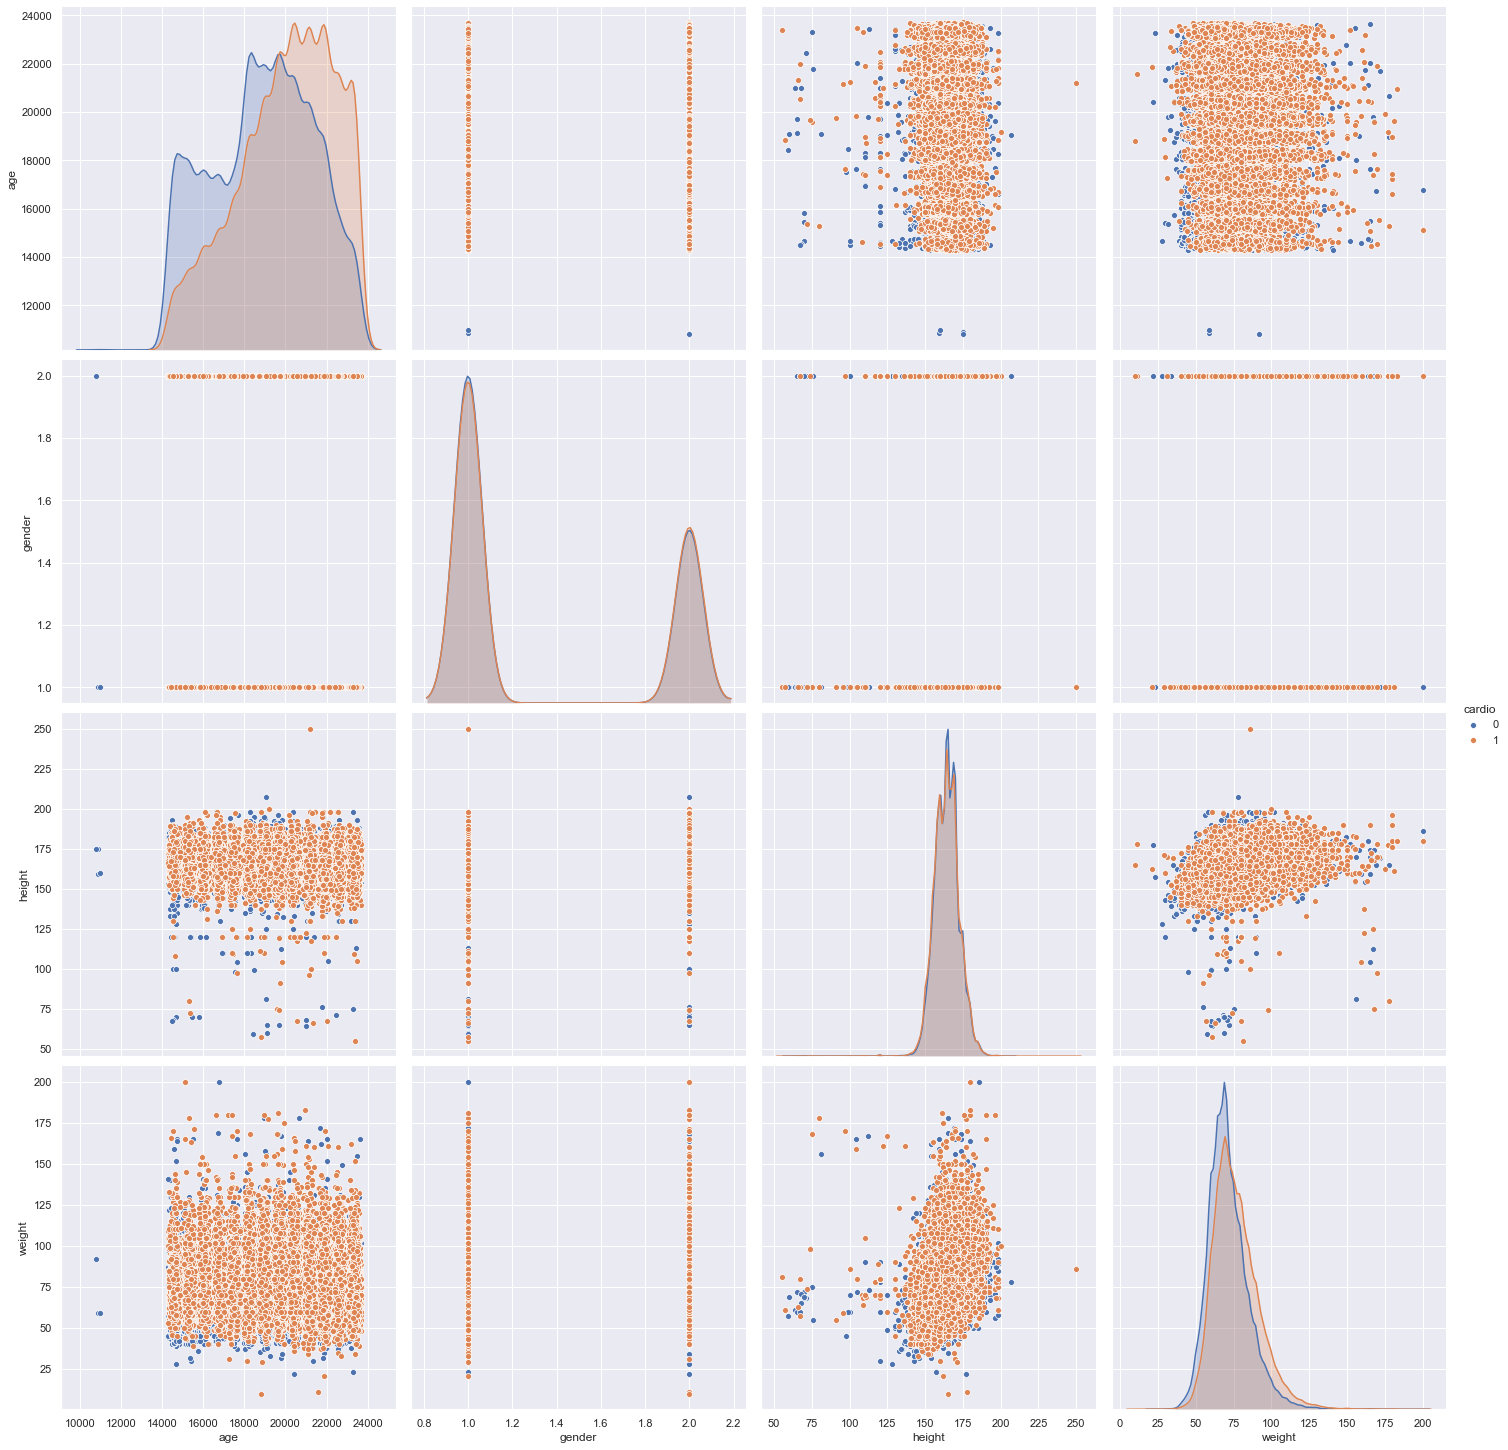

In [8]:
#Create a pairplot for the objective variables and save it as a PNG file
fig1 = sns.pairplot(cardio_obj, height=5, hue='cardio')
fig1.savefig('obj pairplot.png')

This pair plot doesn't elucidate any clear trends between objective predictors and the target variable. The one trend that is somewhat clear is that those with cardiovascular disease are usually a little older than those without cardiovascular disease. 

/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


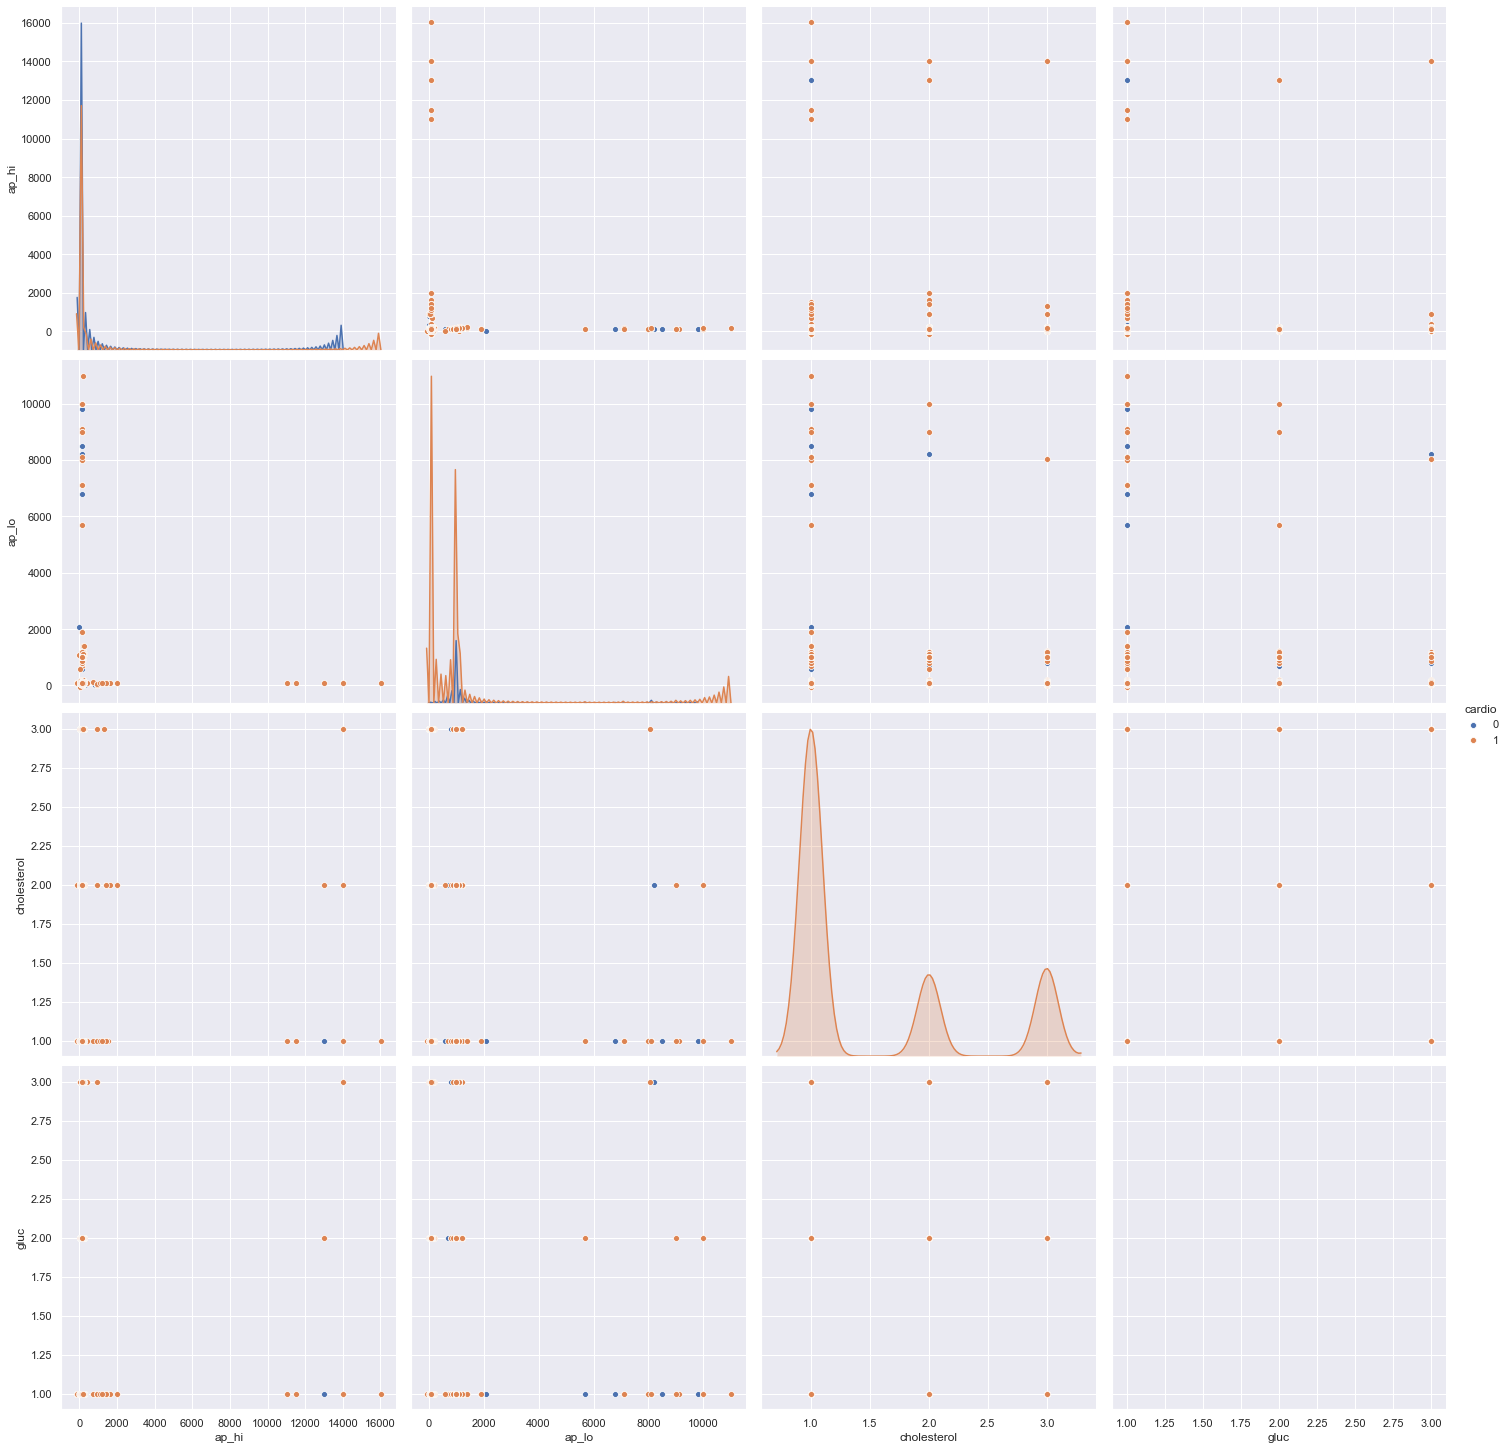

In [5]:
#Create a pairplot for the examination variables and save it as a PNG file
fig2 = sns.pairplot(cardio_exam, height=5, hue='cardio')
fig2.savefig('exam pairplot.png')

This pairplot doesn't show any clear trends

/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/danieltheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


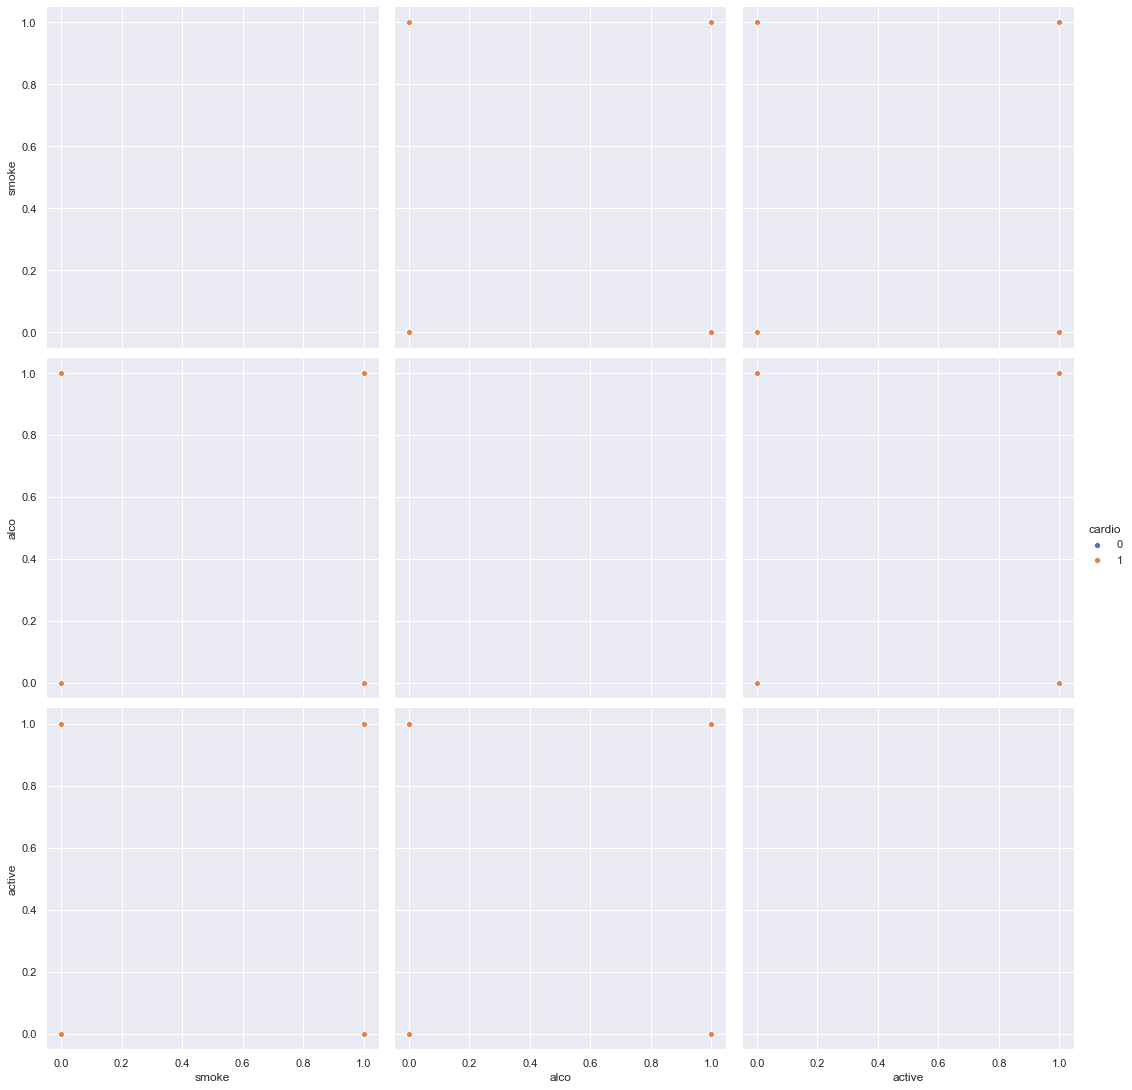

In [10]:
#Create a pairplot for the subjective variables and save it as a PNG file
fig3 = sns.pairplot(cardio_sub, height=5, hue='cardio')
fig3.savefig('sub pairplot.png')

This plot doesn't show anything interesting. 

## Modelling
For this part we need to:
   1. Split the data into train and test data sets
   2. Make the 3 models: Logistic Regression, Support Vector Classifier, and Random Forest Classifier
   3. Train the models 
   4. Test the models

In [11]:
#Load the models and necessary functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [12]:
#Separate data into the predicting features(x) and the test feature(y)
x_cardio = cardio.iloc[:,1:12]
y_cardio = cardio.iloc[:,12]

In [13]:
#Change the categorical variables to the categorical type 
for i in [1,6,7,8,9,10]:
    x_cardio.iloc[:,i] = x_cardio.iloc[:,i].astype('category')
x_cardio.dtypes

age               int64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
dtype: object

In [14]:
#Split data into test and training data. 
x_train, x_test, y_train, y_test = train_test_split(x_cardio, y_cardio, test_size = 0.3, random_state = 16)

In [15]:
#Make all the models
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 12, max_iter = 500)
randForest = RandomForestClassifier(random_state=12)
svc = svm.SVC(gamma='scale')

In [16]:
#Create empty arrray to save times to
t_train1 = np.array([])
#Train the logistic regression model, time it and save that time to the array
start = time.time()
logreg.fit(x_train, y_train)
end = time.time()
t_train1 = np.append(t_train1, end-start)
#Train the random forest model, time it and save that time to the array
start = time.time()
randForest.fit(x_train, y_train)
end = time.time()
t_train1 = np.append(t_train1, end-start)
#Train the support vector classifier, time it and save that time to the array
start = time.time()
svc.fit(x_train, y_train)
end = time.time()
t_train1 = np.append(t_train1, end-start)

In [17]:
#Create empty arrays to store the scoring times and the scores
scores1 = np.array([])
t_test1 = np.array([])
#Score the logistic regression model and save the time and score to its respective variable
start = time.time()
scores1 = np.append(scores1, logreg.score(x_test, y_test))
end = time.time()
t_test1 = np.append(t_test1, end-start)
#Score the random forest model and save the time and score to its respective variable
start = time.time()
scores1 = np.append(scores1, randForest.score(x_test, y_test))
end = time.time()
t_test1 = np.append(t_test1, end-start)
#Score the support vector classifier and save the time and score to its respective variable
start = time.time()
scores1 = np.append(scores1, svc.score(x_test, y_test))
end = time.time()
t_test1 = np.append(t_test1, end-start)

In [18]:
#Show the scores
print(t_train1)
print(t_test1)
scores1

[  1.41739798   7.04942894 102.45316887]
[ 0.13287497  0.85833502 20.68385291]


array([0.69114286, 0.71490476, 0.60419048])

## Feature Engineering
1. Hypertension Feature with 3 levels; normal, high, and severe
2. BMI Feature 
3. Weight class feature with 6 levels; underweight, normal, overweight, obesity class 1, obesity class 2, obesity class 3



In [19]:
#Create another variable with cardio predictors
x_cardio1 = x_cardio

In [20]:
#Create hypertension feature. 180/120 bp is usually considered severe hypertension and above 140/90 is considered 
#hypertension. 
#Create empty hypertension array 
hypertension = np.array([])
#Categorize each patient into their respective hypertension group
for i in range(70000):
    if x_cardio1.iloc[i,4] >= 180 or x_cardio1.iloc[i,5] >=120:
        hypertension = np.append(hypertension, "Severe")
    elif 140 <= x_cardio1.iloc[i,4] < 180 or 90 <= x_cardio1.iloc[i,5] < 120:
        hypertension = np.append(hypertension, "High")
    elif x_cardio1.iloc[i,4] < 140 or x_cardio1.iloc[i,5] < 90:
        hypertension = np.append(hypertension, "Normal")
#Add the hypertension arrray to x_cardio1
x_cardio1['hypertension'] = hypertension

In [21]:
#Create BMI feature
#Create empty BMI array
BMI = np.array([])
#Calculate BMI for each patient and add it to the array
for i in range(70000):
    BMI = np.append(BMI, x_cardio1.iloc[i,3]/((x_cardio1.iloc[i,2]/100)**2))
    #Add array to x_cardio
x_cardio1['BMI'] = BMI

In [22]:
#Create weight class feature 
#Create empty Weight Status array
weight_status = np.array([])
#Categorize each patient into their weight class based on the BMI
for i in x_cardio1.iloc[:,12]:
    if i < 18.5:
        weight_status = np.append(weight_status, "underweight")
    elif i >= 18.5 and i < 25:
        weight_status = np.append(weight_status, "normal")
    elif i >= 25 and i < 30:
        weight_status = np.append(weight_status, "overweight")
    elif i >= 30 and i < 35:
        weight_status = np.append(weight_status, "obesity 1")
    elif i >= 35 and i < 40:
        weight_status = np.append(weight_status, "obesity 2")
    elif i >= 40:
        weight_status = np.append(weight_status, "obesity 3")
x_cardio1['Weight Status'] = weight_status
x_cardio1

age gender  height  weight  ap_hi  ap_lo cholesterol gluc smoke alco  \
0      18393      2     168    62.0    110     80           1    1     0    0   
1      20228      1     156    85.0    140     90           3    1     0    0   
2      18857      1     165    64.0    130     70           3    1     0    0   
3      17623      2     169    82.0    150    100           1    1     0    0   
4      17474      1     156    56.0    100     60           1    1     0    0   
...      ...    ...     ...     ...    ...    ...         ...  ...   ...  ...   
69995  19240      2     168    76.0    120     80           1    1     1    0   
69996  22601      1     158   126.0    140     90           2    2     0    0   
69997  19066      2     183   105.0    180     90           3    1     0    1   
69998  22431      1     163    72.0    135     80           1    2     0    0   
69999  20540      1     170    72.0    120     80           2    1     0    0   

      active hypertension        BMI Weight Status  
0          1       Normal  21.967120        normal  
1          1         High  34.927679     obesity 1  
2          0       Normal  23.507805        normal  
3          1         High  28.710479    overweight  
4          0       Normal  23.011177        normal  
...      ...          ...        ...           ...  
69995      1       Normal  26.927438    overweight  
69996      1         High  50.472681     obesity 3  
69997      0       Severe  31.353579     obesity 1  
69998      0       Normal  27.099251    overweight  
69999      1       Normal  24.913495        normal  

[70000 rows x 14 columns]

In [23]:
#Change all categorical variables to category type
for i in [1,6,7,8,9,10,11,13]:
    x_cardio1.iloc[:,i] = x_cardio1.iloc[:,i].astype('category')
x_cardio1.dtypes

age                 int64
gender           category
height              int64
weight            float64
ap_hi               int64
ap_lo               int64
cholesterol      category
gluc             category
smoke            category
alco             category
active           category
hypertension     category
BMI               float64
Weight Status    category
dtype: object

In [24]:
#Encode each categorical variable before fitting logistic regression model
x_cardio1 = x_cardio1.select_dtypes(exclude=['int64', 'float64']) \
                .apply(LabelEncoder().fit_transform) \
                .join(x_cardio1.select_dtypes(include=['number']))

In [25]:
x_cardio1

gender  cholesterol  gluc  smoke  alco  active  hypertension  \
0           1            0     0      0     0       1             1   
1           0            2     0      0     0       1             0   
2           0            2     0      0     0       0             1   
3           1            0     0      0     0       1             0   
4           0            0     0      0     0       0             1   
...       ...          ...   ...    ...   ...     ...           ...   
69995       1            0     0      1     0       1             1   
69996       0            1     1      0     0       1             0   
69997       1            2     0      0     1       0             2   
69998       0            0     1      0     0       0             1   
69999       0            1     0      0     0       1             1   

       Weight Status    age  height  weight  ap_hi  ap_lo        BMI  
0                  0  18393     168    62.0    110     80  21.967120  
1                  1  20228     156    85.0    140     90  34.927679  
2                  0  18857     165    64.0    130     70  23.507805  
3                  4  17623     169    82.0    150    100  28.710479  
4                  0  17474     156    56.0    100     60  23.011177  
...              ...    ...     ...     ...    ...    ...        ...  
69995              4  19240     168    76.0    120     80  26.927438  
69996              3  22601     158   126.0    140     90  50.472681  
69997              1  19066     183   105.0    180     90  31.353579  
69998              4  22431     163    72.0    135     80  27.099251  
69999              0  20540     170    72.0    120     80  24.913495  

[70000 rows x 14 columns]

In [26]:
#Split data with added features into test and training data. 
x_train, x_test, y_train, y_test = train_test_split(x_cardio1, y_cardio, test_size = 0.3, random_state = 16)

In [27]:
#train models with new features, and record the training times. 
t_train2 = np.array([])
start = time.time()
logreg.fit(x_train, y_train)
end = time.time()
t_train2 = np.append(t_train2, end-start)
start = time.time()
randForest.fit(x_train, y_train)
end = time.time()
t_train2 = np.append(t_train2, end-start)
start = time.time()
svc.fit(x_train, y_train)
end = time.time()
t_train2 = np.append(t_train2, end-start)

In [28]:
#Score all the models again, and save the scoring times and scores to their respective variables
scores2 = np.array([])
t_test2 = np.array([])
start = time.time()
scores2 = np.append(scores2, logreg.score(x_test, y_test))
end = time.time()
t_test2 = np.append(t_test2, end-start)
start = time.time()
scores2 = np.append(scores2, randForest.score(x_test, y_test))
end = time.time()
t_test2 = np.append(t_test2, end-start)
start = time.time()
scores2 = np.append(scores2, svc.score(x_test, y_test))
end = time.time()
t_test2 = np.append(t_test2, end-start)

## Feature Importance


In [29]:
#Graph the Logistic Regression Model's feature coefficients and save the figure
imp1 = px.bar(x = x_cardio1.columns, 
              y = logreg.coef_[0],        
              title = 'Logistic Regression Feature Importances', 
              labels = dict(x = 'Features', y = 'Feature Coefficient'))
imp1.write_image("Logreg Imp.png")
imp1.show()

In [30]:
#Graph the Random Forest Model's feature importance and save the figure
imp2 = px.bar(x = x_cardio1.columns, y = randForest.feature_importances_, 
              title = 'Random Forest Feature Importances', 
              labels = dict(x = 'Features', y = 'Feature Importance'))
imp2.write_image('Random Forest Imp.png')
imp2.show()

Although SVM does have an coef_ attriute similar to the logistic regression coef_ attribute, it can only be used if if the SVM has a linear kernel, or is able to separate the two target classes with one line and this model doesn't. 

The next step is to remove some of the lesser important features and see if accuracy is retained. The following features will be removed:
   * gluc
   * smoke
   * alco
   * Weight Status


In [31]:
#Remove the gluc, smoke, alco, and weight status variables
x_cardio2 = x_cardio1.iloc[:,[0,1,6,8,9,10,11,12,13]]

In [32]:
x_cardio2

gender  cholesterol  hypertension    age  height  weight  ap_hi  ap_lo  \
0           1            0             1  18393     168    62.0    110     80   
1           0            2             0  20228     156    85.0    140     90   
2           0            2             1  18857     165    64.0    130     70   
3           1            0             0  17623     169    82.0    150    100   
4           0            0             1  17474     156    56.0    100     60   
...       ...          ...           ...    ...     ...     ...    ...    ...   
69995       1            0             1  19240     168    76.0    120     80   
69996       0            1             0  22601     158   126.0    140     90   
69997       1            2             2  19066     183   105.0    180     90   
69998       0            0             1  22431     163    72.0    135     80   
69999       0            1             1  20540     170    72.0    120     80   

             BMI  
0      21.967120  
1      34.927679  
2      23.507805  
3      28.710479  
4      23.011177  
...          ...  
69995  26.927438  
69996  50.472681  
69997  31.353579  
69998  27.099251  
69999  24.913495  

[70000 rows x 9 columns]

In [33]:
#Split data with added features into test and training data. 
x_train, x_test, y_train, y_test = train_test_split(x_cardio2, y_cardio, test_size = 0.3, random_state = 16)

In [34]:
#train models with less features, record all training times 
t_train3 = np.array([])
start = time.time()
logreg.fit(x_train, y_train)
end = time.time()
t_train3 = np.append(t_train3, end-start)
start = time.time()
randForest.fit(x_train, y_train)
end = time.time()
t_train3 = np.append(t_train3, end-start)

In [35]:
#Score all the models again, save scoring times and scores to their respective variables
scores3 = np.array([])
t_test3 = np.array([])
start = time.time()
scores3 = np.append(scores3, logreg.score(x_test, y_test))
end = time.time()
t_test3 = np.append(t_test3, end-start)
start = time.time()
scores3 = np.append(scores3, randForest.score(x_test, y_test))
end = time.time()
t_test3 = np.append(t_test3, end-start)

In [36]:
#Since the support vector classifier wasn't used for trial 3 put NA values 
t_train3 = np.append(t_train3, 'NA')
t_test3 = np.append(t_test3, 'NA')
scores3 = np.append(scores3, 'NA')

In [37]:
#Combine all the times and scores into 1 dataframe
results = pd.DataFrame([t_train1,t_test1,scores1, t_train2, t_test2, scores2, t_train3, t_test3, scores3], 
                      columns = ['Logistic Regression', 'Random Forest', 'SVM'], 
                      index = ['Fit Time 1', 'Score Time 1', 'Score 1', 
                              'Fit Time 2', 'Score Time 2', 'Score 2',
                              'Fit Time 3', 'Score Time 3', 'Score 3'])

In [38]:
#Save the results to excel
results.to_excel(excel_writer = 'Results.xlsx')
results

Logistic Regression       Random Forest       SVM
Fit Time 1                1.4174             7.04943   102.453
Score Time 1            0.132875            0.858335   20.6839
Score 1                 0.691143            0.714905   0.60419
Fit Time 2              0.985841             6.42569   124.662
Score Time 2           0.0364609            0.883878   24.1657
Score 2                 0.705333            0.712333  0.603571
Fit Time 3     2.241626024246216   8.666353940963745        NA
Score Time 3    0.02789306640625  0.6919710636138916        NA
Score 3       0.7053333333333334   0.705047619047619        NA

Both models decreased a little, but retained most accuracy depite removing 4 features. Although they took much longer to train, which is strange since there was less features. 